In [1]:
import math

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend import Legend
import seaborn as sns
from src.coinjump.coinjump_learn.training.ppo_coinjump_logic_policy import NSFR_ActorCritic

In [91]:
#weight = torch.softmax(torch.tensor([[0.6796, 0.3204],
#                       [0.4077, 0.5923]]), dim=1)
# weight = torch.rand((5, 10)) * 10
# weight = nn.Parameter(torch.Tensor(torch.rand((5, 10))))
W = torch.Tensor(np.random.normal(size=(5, 75)))
print(W)

tensor([[-1.9593e+00,  3.4196e-01, -9.1606e-01, -6.1278e-01, -5.6864e-01,
          5.0379e-01, -1.9000e+00, -6.1808e-01, -8.7754e-01,  5.6794e-01,
          7.6720e-01, -1.9507e+00, -1.5044e+00, -1.0264e+00,  6.6937e-02,
         -1.0578e+00, -1.8788e-01,  6.5157e-01, -1.3101e+00, -1.3112e+00,
          2.9529e-01, -2.0433e+00,  1.0770e+00, -3.8172e-01, -5.4971e-01,
         -2.9134e-01, -9.7587e-01,  6.5346e-01, -6.1912e-01, -6.7860e-01,
          1.1082e+00,  6.2933e-01,  1.1010e+00, -1.2469e+00,  1.1643e+00,
         -1.4291e+00, -1.0964e+00, -2.0173e-01, -1.6380e-01, -1.2455e+00,
         -2.8248e-01,  4.7039e-01, -8.4872e-01,  4.7134e-01,  1.4444e+00,
         -1.5695e+00,  7.9516e-01, -2.1326e+00, -1.9401e-01,  1.6236e+00,
         -9.7350e-04, -7.9236e-01,  3.4421e-01,  1.3141e+00, -5.7580e-01,
         -3.4909e-01, -1.7712e+00, -5.5404e-01,  2.6000e+00,  1.7913e-01,
         -1.8247e+00,  1.7038e+00,  1.4342e+00,  2.1026e+00,  3.4627e-01,
         -7.4525e-01,  2.1761e+00,  4.

In [156]:
def plot_weights(weights):
    weights = torch.softmax(weights, dim=1)
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(5, 12))
    plt.xlim([0, 1])
    # x_label = ['Jump', 'Left_key', 'Right_key', 'Left_door',
    #            'Right_door', 'Stay', 'Jump_door', 'Left_nothing', 'Right_enemy',
    #            'Stay_nothing']
    y_label = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15'
        , 'LK1', 'LK2', 'LK3', 'LK4', 'LK5', 'LK6', 'LK7', 'LK8', 'LK9', 'LK10', 'LK11', 'LK12', 'LK13', 'LK14', 'LK15'
        , 'LD1', 'LD2', 'LD3', 'LD4', 'LD5', 'LD6', 'LD7', 'LD8', 'LD9', 'LD10', 'LD11', 'LD12', 'LD13', 'LD14', 'LD15'
        , 'RK1', 'RK2', 'RK3', 'RK4', 'RK5', 'RK6', 'RK7', 'RK8', 'RK9', 'RK10', 'RK11', 'RK12', 'RK13', 'RK14', 'RK15'
        , 'RD1', 'RD2', 'RD3', 'RD4', 'RD5', 'RD6', 'RD7', 'RD8', 'RD9', 'RD10', 'RD11', 'RD12', 'RD13', 'RD14', 'RD15']
    # x_label = ['Jump', 'Left_k', 'Right_k', 'Left_d',
    #            'Right_d', 'Stay', 'Jump_d', 'Left_n', 'Right_e',
    #            'Stay_n']
    y = np.arange(len(y_label))
    width = 0.5
    #X = x - width * 3
    for i, W in enumerate(weights):
        W_ = W.detach().cpu().numpy()

        # X = X + width
        # plt.bar(X, W_, width=width, alpha=1, label='C' + str(i))
        plt.barh(y=y,width=W_, alpha=1, label='C' + str(i))
        # plt.bar(range(len(W_)), W_, width=0.2, alpha=1, label='C' + str(i))

    plt.yticks(y, y_label, fontproperties="Microsoft YaHei", size=8)
    plt.xlabel('Weights', size=14)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    # plt.savefig(image_directory + 'W_' + str(time_step) + '.png', bbox_inches='tight')
    plt.show()
    plt.close()

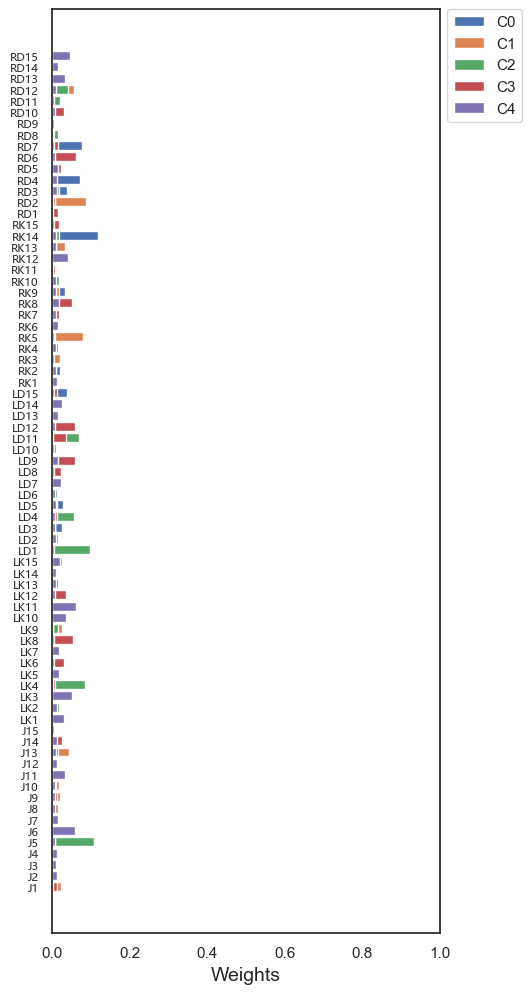

In [157]:
plot_weights(W)

In [4]:
W = torch.Tensor(np.random.normal(size=(5, 10)))
print(W)

NameError: name 'np' is not defined

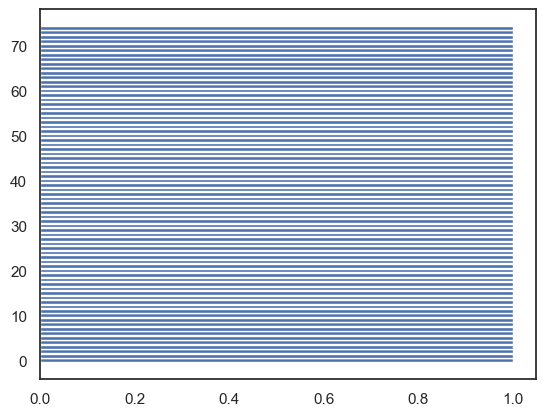

In [145]:
import numpy as np
data = [5, 20, 15, 25, 10]
data = np.ones(75)
plt.barh(range(len(data)), data)
plt.show()

In [143]:
import math
import torch


def fuzzy_position(pos1, pos2, keyword):
    x = pos2[:, 0] - pos1[:, 0]
    y = pos2[:, 1] - pos1[:, 1]
    tan = torch.atan2(y, x)
    degree = tan[:] / torch.pi * 180

    if keyword == 'top':
        probs = 1 - abs(degree[:] - 90) / 90
        result = torch.where((180 >= degree) & (degree >= 0), probs, 0)
    elif keyword == 'left':
        probs = (abs(degree[:]) - 90) / 90
        result = torch.where((degree <= -90) | (degree >= 90), probs, 0)
    elif keyword == 'bottom':
        probs = 1 - abs(degree[:] + 90) / 90
        result = torch.where((0 >= degree) & (degree >= -180), probs, 0)
    elif keyword == 'right':
        probs = 1 - abs(degree[:]) / 90
        result = torch.where((90 >= degree) & (degree >= -90), probs, 0)

    return result


a = torch.tensor([[0, 5], [9, 1]])
b = torch.tensor([[0, 6], [0.5,8]])
# c = torch.tensor([[0, 2]])
# d = torch.tensor([[1, 3]])
#
print(fuzzy_position(a, b, keyword='left'))
print(fuzzy_position(a, b, keyword='bottom'))
print(fuzzy_position(a, b, keyword='top'))
# print(fuzzy_position(a, b, keyword='right'))

tensor([0.0000, 0.5614])
tensor([0., 0.])
tensor([1.0000, 0.4386])


In [11]:
''

In [2]:
import torch

a = torch.sigmoid(torch.tensor(9.9999))
print(a)

tensor(1.0000)


In [7]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim=1):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [17]:
logi = LogisticRegression(input_dim=1)

In [26]:

dist = torch.tensor([2,1],dtype=torch.float)
dist = dist.unsqueeze(1)
print(dist)
print(list(logi.parameters()))
print(logi(dist))


tensor([[2.],
        [1.]])
[Parameter containing:
tensor([[-0.0786]], requires_grad=True), Parameter containing:
tensor([-0.4418], requires_grad=True)]
tensor([[0.3546],
        [0.3728]], grad_fn=<SigmoidBackward0>)


In [161]:
a ='jump'
b =['jump1']
print(a in b)

False
